In [1]:
import pandas as pd
import numpy as np
import csv
import os
import re

%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
matplotlib.rcParams.update({'font.size': 16})




In [5]:
##Reads text file and generates csv with ID, ASIN, group, salesrank, number of reviews, average review

Input_file = 'amazon-meta.txt'
Output_file = 'amazon_data_full.csv'
header = [
    "Id",
    "ASIN",
    "group",
    "salesrank"]


with open(Output_file, 'w') as output:
    writer = csv.writer(output)
    writer.writerow(['Id', 'ASIN', 'group', 'salesrank', 'number of reviews','average rating'])


    with open(Input_file) as f:
        data = [None] * 6
        for line in f:
            line = line.strip()
            if line == "":
                #print(data)
                writer.writerow([data[0],data[1],data[2],data[3],data[4],data[5]])
                data = [None] * 6
                continue
            parts = line.split(": ",1)
            for i in range(len(header)):
                  if parts[0] == header[i]:
                        data[i] = parts[1]
            if parts[0] == 'reviews':
                a = re.findall(r'[-+]?\d*\.\d+|\d+', parts[1])
                data[4] = a[0]
                data[5] = a[2]
                

In [39]:
file = 'amazon_data_full.csv'
df = pd.read_csv(file);
df = df.dropna(subset = ['number of reviews','average rating'])
df.head()



,Id,ASIN,group,salesrank,number of reviews,average rating
2,1.0,0827229534,Book,396585.0,2.0,5.0
3,2.0,0738700797,Book,168596.0,12.0,4.5
4,3.0,0486287785,Book,1270652.0,1.0,5.0
5,4.0,0842328327,Book,631289.0,1.0,4.0
6,5.0,1577943082,Book,455160.0,0.0,0.0


In [114]:
df_reviews = df.ix[df['number of reviews'] > 0]
review_counts = df_reviews["average rating"].value_counts(dropna=False).sort_index()
review_counts

1.0      2732
1.5       837
2.0      4117
2.5      6561
3.0     21227
3.5     34405
4.0     83458
4.5    103563
5.0    145835
Name: average rating, dtype: int64

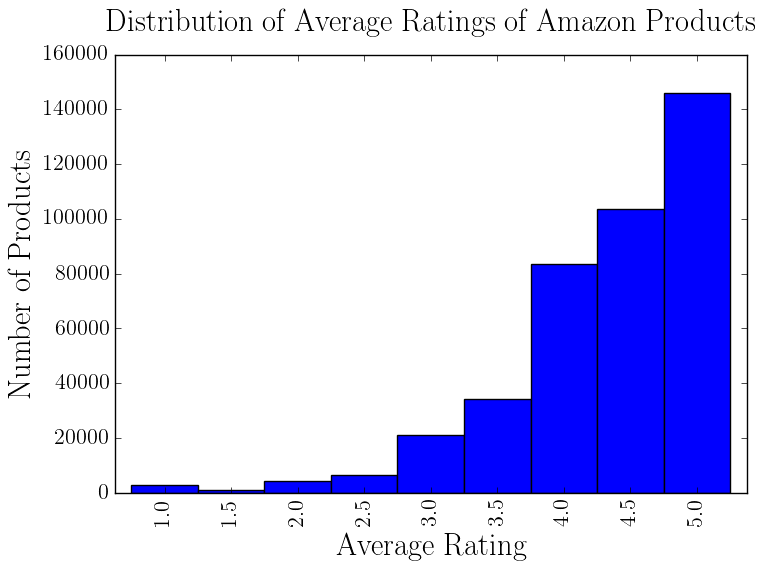

In [115]:
figure = plt.figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
plt.xlabel('Average Rating',fontsize=22)
plt.ylabel('Number of Products',fontsize=22)
plt.title('Distribution of Average Ratings of Amazon Products',fontsize=22,y=1.04)
review_counts.plot(kind='bar',width =1.0)
plt.tight_layout()
plt.savefig("Fig1.pdf",format="pdf")
plt.show()

4.210996279837834


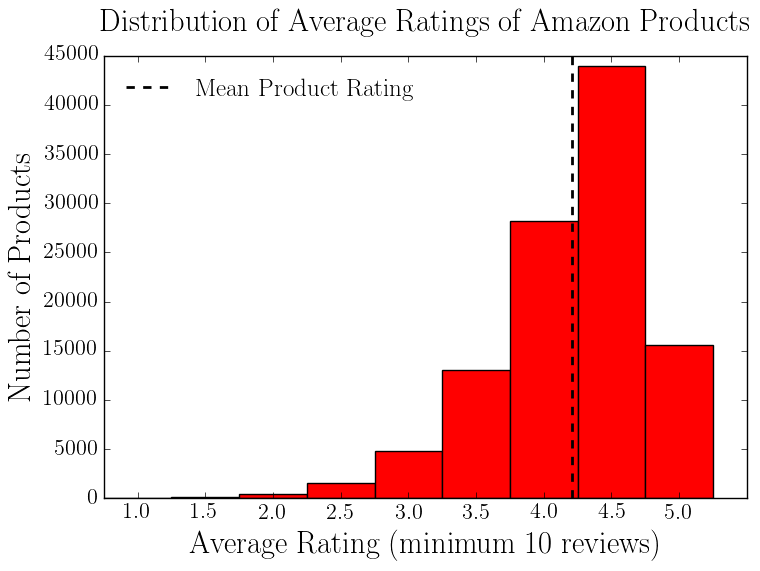

In [287]:
df_reviews = df.ix[df['number of reviews'] > 10]
review_counts = df_reviews["average rating"].value_counts(dropna=False).sort_index()
avg_review = df_reviews['average rating'].mean()
print(avg_review)

figure = plt.figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
plt.xlabel('Average Rating (minimum 10 reviews)',fontsize=22)
plt.ylabel('Number of Products',fontsize=22)
plt.title('Distribution of Average Ratings of Amazon Products',fontsize=22,y=1.04)
plt.bar(np.arange(1,5.5,0.5),np.array(review_counts),0.5,color='r',align = 'center')
ys = np.linspace(ymin,ymax,4)
plt.plot(avg_review*np.ones(len(ys)),ys,'--k',linewidth = 2,label = 'Mean Product Rating')
plt.xlim([0.75,5.5])
plt.xticks(np.arange(1,5.5,0.5))
plt.legend(frameon = False,numpoints = 1,fontsize=18,loc =2)
plt.tight_layout()
plt.savefig("Fig2.pdf",format="pdf")


In [42]:
file = 'amazon_data_full.csv'
df = pd.read_csv(file);
df = df.ix[df['number of reviews'] > 0]
#df.head()

,Id,ASIN,group,salesrank,number of reviews,average rating
2,1.0,0827229534,Book,396585.0,2.0,5.0
3,2.0,0738700797,Book,168596.0,12.0,4.5
4,3.0,0486287785,Book,1270652.0,1.0,5.0
5,4.0,0842328327,Book,631289.0,1.0,4.0
7,6.0,0486220125,Book,188784.0,17.0,4.0


In [27]:
grouped = df.groupby('number of reviews')
dat = grouped["average rating"].agg(np.mean)

In [4]:
file = 'amazon_data_full.csv'
df = pd.read_csv(file);
df = df.ix[df['number of reviews'] > 0]
df = df[df['salesrank']>0]
#df

In [514]:
grouped = df.groupby('average rating')
grouped.size()
dat1 = grouped["salesrank"].agg(np.mean)
dat2 = grouped['number of reviews'].agg(np.mean)

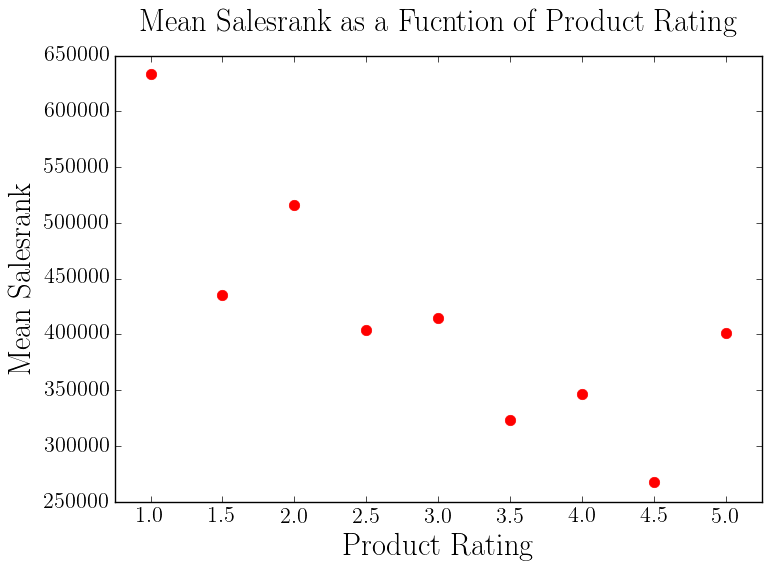

In [587]:
figure = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(dat1,'.r',markersize = 15)
plt.xlabel('Product Rating',fontsize=22)
plt.ylabel('Mean Salesrank',fontsize=22)
plt.title('Mean Salesrank as a Fucntion of Product Rating',fontsize=22,y=1.04)
plt.xlim([0.75,5.25])
plt.xticks(np.arange(1,5.5,0.5))
plt.tight_layout()
plt.savefig("Fig5.pdf",format="pdf")
plt.show()

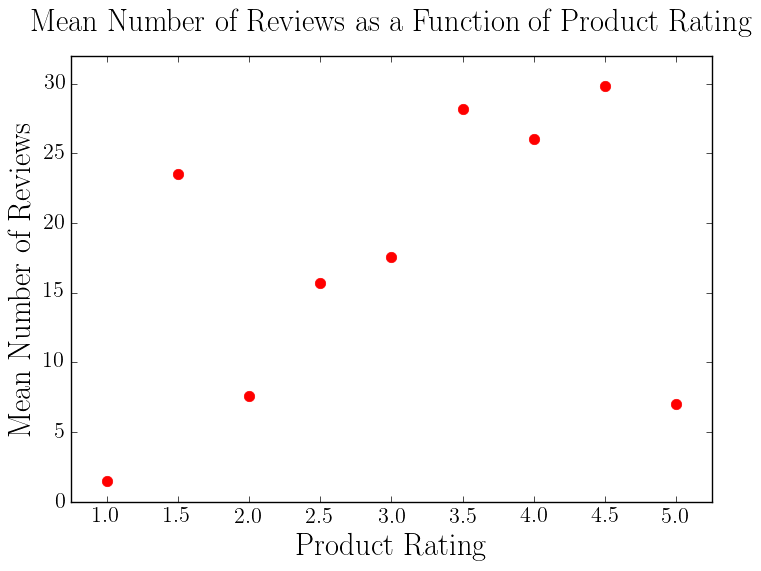

In [586]:
figure = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(dat2,'.r',markersize = 15)
plt.xlabel('Product Rating',fontsize=22)
plt.ylabel('Mean Number of Reviews',fontsize=22)
plt.title('Mean Number of Reviews as a Function of Product Rating',fontsize=22,y=1.04)
plt.xlim([0.75,5.25])
plt.ylim([0, 32])
plt.xticks(np.arange(1,5.5,0.5))
plt.tight_layout()
plt.savefig("Fig6.pdf",format="pdf")
plt.show()

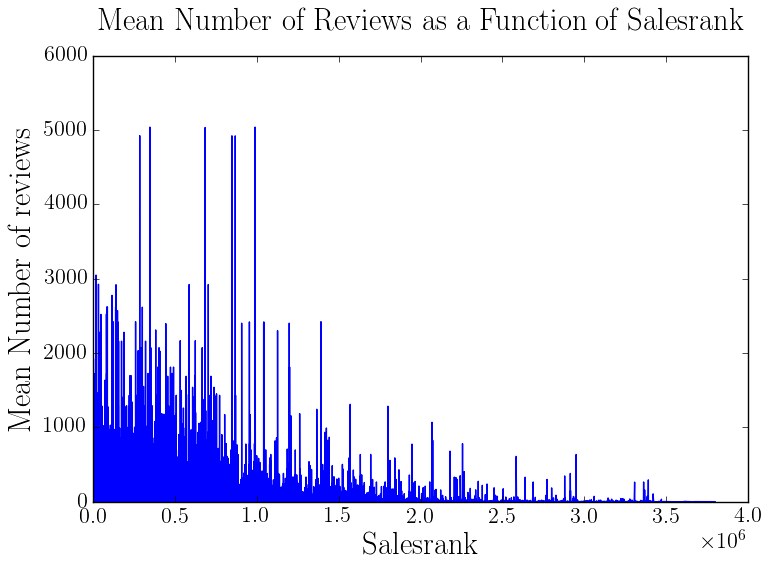

In [13]:
grouped = df.groupby('salesrank')
dat = grouped["number of reviews"].agg(np.mean)
figure = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
plt.plot(dat,'b')
plt.xlabel('Salesrank', fontsize = 22)
plt.ylabel('Mean Number of reviews',fontsize = 22)
plt.title('Mean Number of Reviews as a Function of Salesrank',fontsize=22,y=1.04)
#plt.xticks(np.arange(1000000,5000000,1000000))
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
plt.tight_layout()
plt.savefig("Fig7.pdf",format="pdf")
plt.show()

In [77]:
file = 'amazon_data_full.csv'
df = pd.read_csv(file);
df = df.ix[df['number of reviews'] > 0]
#df = df[df['salesrank']>0]
df.head()

,Id,ASIN,group,salesrank,number of reviews,average rating
2,1.0,0827229534,Book,396585.0,2.0,5.0
3,2.0,0738700797,Book,168596.0,12.0,4.5
4,3.0,0486287785,Book,1270652.0,1.0,5.0
5,4.0,0842328327,Book,631289.0,1.0,4.0
7,6.0,0486220125,Book,188784.0,17.0,4.0


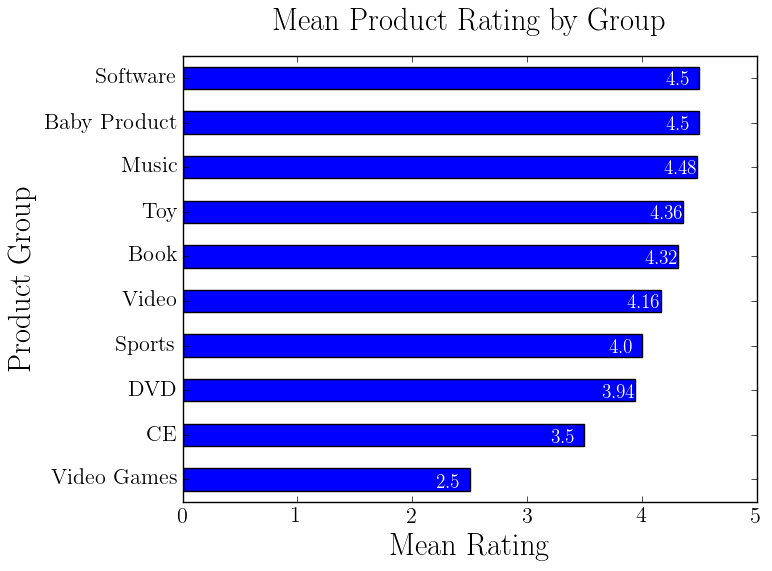

In [185]:
categories = df.groupby('group')
avgs = categories["average rating"].agg(np.mean)
#avgs.sort_index().plot(kind='barh')
ax = avgs.sort_values(ascending=1).plot(kind = 'barh',figsize=[8,6])
plt.xlabel('Mean Rating',fontsize=22)
plt.ylabel('Product Group',fontsize=22)
plt.title('Mean Product Rating by Group',fontsize=22,y=1.04)
plt.xlim([0, 5.0])
y = np.array(avgs.sort_values(ascending=1))
y = np.around(y, decimals=2)
ind = np.arange(len(y))
for i, v in enumerate(y):
    ax.text(v-0.29, i-0.18 , str(v), color='white',fontsize=14)
plt.tight_layout()
plt.savefig("Fig8.pdf",format="pdf")
plt.show()

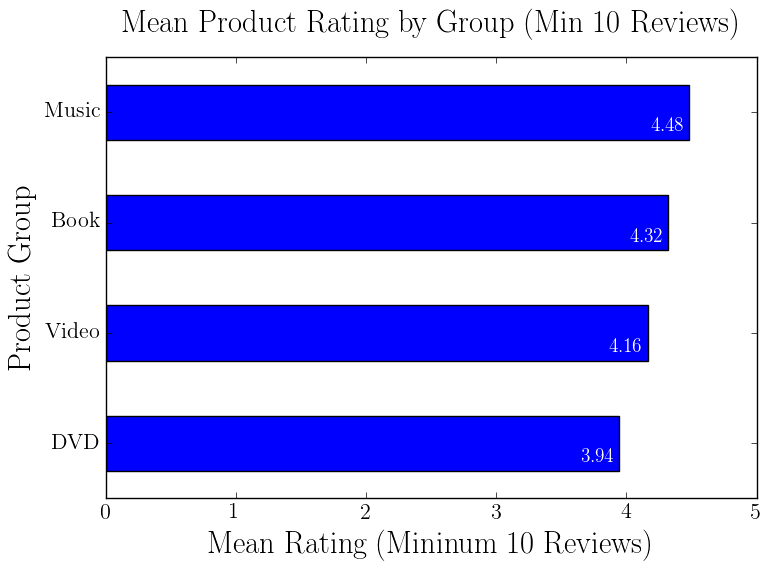

In [216]:
grouped = df.groupby(['group'])
A = grouped.agg(np.mean)
A = A.ix[A['number of reviews'] > 10]
ax = A['average rating'].sort_values(ascending=1).plot(kind = 'barh',figsize=[8,6],width = 0.5)
plt.xlabel('Mean Rating (Mininum 10 Reviews)',fontsize=22)
plt.ylabel('Product Group',fontsize=22)
plt.title('Mean Product Rating by Group (Min 10 Reviews)',fontsize=22,y=1.04)
plt.xlim([0, 5.0])
y = np.array(A['average rating'].sort_values(ascending=1))
y = np.around(y, decimals=2)
ind = np.arange(len(y))
for i, v in enumerate(y):
    ax.text(v-0.29, i-0.18 , str(v), color='white',fontsize=14)
plt.tight_layout()
plt.savefig("Fig9.pdf",format="pdf")
plt.show()
